In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

%run graphing_function_recent.ipynb

In [2]:
#Use this for all adjustable values 
#input file paths here (include .csv):
video_path = r'\\10.25.16.5\yaochen\Active\DLC\Final_Models\Lindsey\escape_behavior_2-lindsey_christinger-2024-06-13_v1\D1D2\coords_csv\CoordM6_07-17-24_control_P2_videoDLC_resnet50_escape_behavior_2Jun13shuffle1_1030000_filtered_day.csv'
time_path = r'\\10.25.16.5\yaochen\Active\Hanna\Escape_behavior\round2_HannaEscapeBehavior\videoTimestamp\M6_07-17-24_control_P2_videoTimestamp0.csv'
audio_path = r'\\10.25.16.5\yaochen\Active\Hanna\Escape_behavior\round2_HannaEscapeBehavior\stimulusTimestamp\M6_07-17-24_control_P2_stimulusTimestamp0.csv'

north_pixel = 126
south_pixel = 445
east_pixel = 485
west_pixel = 143
shelter_x_pixel = 458
shelter_y_pixel = 302

#estimate for when mouse reaches shelter
escape_done = 1.5 #time mouse reaches shelter location

In [3]:
#manually decide?
escape_response = True
freezing_response = False
##small_angle = 

In [4]:
#read in DLC data, convert to cm, center platform at 0,0
shelter_x, shelter_y, x_diam, y_diam, coord_scaled = single_mouse_data(north_pixel, south_pixel, east_pixel, west_pixel, shelter_x_pixel, shelter_y_pixel, video_path)

In [5]:
#replace any head, nose, or center points with likelihood < .9 with NA
filter_data(.8, coord_scaled)

In [6]:
#coord_filtered

In [7]:
timestamp_df = convert_time(time_path, coord_scaled, audio_path, 2)

In [8]:
coord_scaled.tail()

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,center_x,center_y,center_likelihood,spine2_x,spine2_y,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set
8479,8479,8479,6.462268,12.752208,0.996794,5.721651,11.390150,0.999910,5.052694,11.658928,...,4.287827,8.189698,0.999984,3.579901,6.522797,0.999819,2.692193,4.581429,0.999930,31.190771
8480,8480,8480,7.272858,14.200610,0.998235,6.612658,12.623094,0.999818,5.802728,12.941901,...,5.127303,9.678530,0.999902,4.352144,8.030443,0.999971,3.666612,6.197052,0.999855,31.230784
8481,8481,8481,7.822773,14.870204,0.975533,7.205580,13.953295,0.999941,6.594418,14.168106,...,5.766122,11.097871,0.999978,5.069905,9.421931,0.999942,4.391895,7.673127,0.999957,31.271488
8482,8482,8482,7.822773,14.870204,0.982884,7.205580,13.953295,0.999965,6.594418,14.168106,...,5.766122,11.097871,0.999974,5.069905,9.421931,0.999972,4.391895,7.673127,0.999978,31.311066
8483,8483,8483,7.822773,14.870204,0.994463,7.205580,13.953295,0.999759,6.594418,14.168106,...,5.766122,11.097871,0.999924,5.069905,9.421931,0.999928,4.391895,7.673127,0.999917,31.350797


In [9]:
#REPLACE ONCE WE HAVE STIMULUS TIMESTAMPS
#returns start and stop times of stimulus.
#start, stimulus_end = audio_timing(stimulus_start, stimulus_end, audio_path, coord_scaled['time'].iloc[-1])

In [10]:
#find time stimulus ends and mouse reaches shelter(escape) if stimulus is set to 0s
#end, escape = time_set_zero(start, stimulus_end, escape_done, coord_scaled)

In [11]:
#calculate displacement as 'displacement'
displacement(shelter_x, shelter_y, coord_scaled)

In [12]:
#calculate speed as 'speed' and change in displacement as 'delta_vector'
total_distance = speed(coord_scaled)

In [13]:
#calculate head angle as 'head_angle'
angle(shelter_x, shelter_y, coord_scaled)

In [14]:
#calculate head angle speed as 'angle_speed'
angle_speed(coord_scaled)

In [15]:
#create dataframes isolated to 4 ranges: just shelter reaching, 3 seconds before and 6 after, 2 before and 4 after, and 1 where you can input your own parameters
#return 4 dataframes 
escape_only, four_second, six_second, long_range, escape_estimate = dataframe_ranges(-7, 14, escape_done,coord_scaled)

In [16]:
escape_only

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
7700,7700,7700,-0.052396,5.880409,0.999856,-1.676046,6.292855,0.999985,-1.517007,7.162764,...,0.999998,-6.925898,8.544407,0.999993,0.022925,29.964377,0.349866,0.013901,0.134581,0.066842
7701,7701,7701,-0.061524,5.879330,0.999870,-1.678365,6.289173,0.999984,-1.521721,7.160558,...,0.999998,-6.925898,8.541746,0.999994,0.062938,29.976704,0.310433,0.012421,0.134216,-0.009118
7702,7702,7702,-0.071469,5.866024,0.999861,-1.683776,6.289097,0.999985,-1.523457,7.160558,...,0.999998,-6.937421,8.535875,0.999993,0.102938,29.976346,0.180232,0.007209,0.142603,0.209671
7703,7703,7703,-0.078110,5.866024,0.999918,-1.734207,6.273154,0.999988,-1.547326,7.145432,...,0.999998,-7.006887,8.535875,0.999996,0.144704,30.020398,1.062808,0.044389,0.127825,-0.353835
7704,7704,7704,-0.078110,5.866024,0.999922,-1.734207,6.272162,0.999977,-1.547326,7.139427,...,0.999998,-7.096003,8.518555,0.999994,0.182989,30.035230,1.712337,0.065557,0.127295,-0.013824
7705,7705,7705,-0.078110,5.879184,0.999932,-1.734207,6.272162,0.999981,-1.547326,7.139427,...,0.999998,-7.096003,8.468753,0.999994,0.223386,30.035230,0.000000,0.000000,0.119786,-0.185878
7706,7706,7706,0.083771,5.879184,0.999918,-1.666826,6.262738,0.999990,-1.491718,7.139421,...,0.999998,-7.096003,8.446589,0.999994,0.262963,30.035230,0.000000,0.000000,0.102558,-0.435314
7707,7707,7707,0.170171,5.879184,0.999868,-1.550428,6.245108,0.999992,-1.351202,7.139421,...,0.999998,-6.967723,8.435408,0.999992,0.303399,29.895780,3.448713,0.139452,0.096578,-0.147899
7708,7708,7708,0.373349,5.776097,0.999833,-1.401084,6.199427,0.999995,-1.103793,7.117596,...,0.999998,-6.894790,8.433308,0.999994,0.343245,29.757390,3.498884,0.139417,0.122269,0.644764
7709,7709,7709,0.421113,5.747911,0.999836,-1.380938,6.199427,0.999995,-1.094381,7.094417,...,0.999998,-6.773559,8.386564,0.999995,0.383027,29.687629,1.774413,0.070590,0.133495,0.282179


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

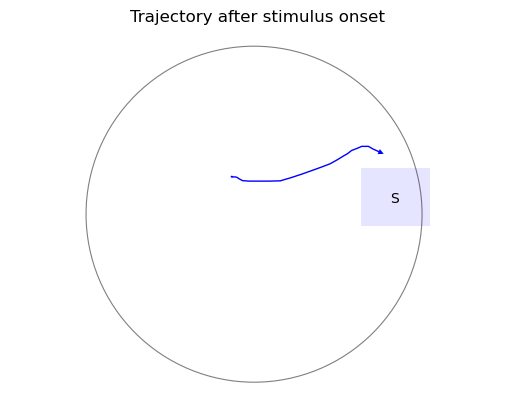

In [17]:
trajectory(shelter_x, shelter_y, x_diam, y_diam, escape_only)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

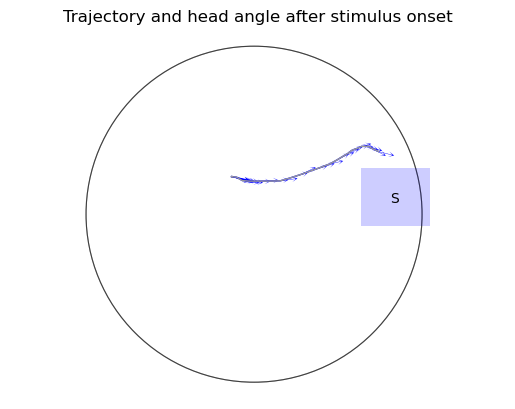

In [18]:
head_angle_trajectory_figure(shelter_x, shelter_y, x_diam, y_diam, escape_only)

In [19]:
escape_only

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
7700,7700,7700,-0.052396,5.880409,0.999856,-1.676046,6.292855,0.999985,-1.517007,7.162764,...,0.999998,-6.925898,8.544407,0.999993,0.022925,29.964377,0.349866,0.013901,0.134581,0.066842
7701,7701,7701,-0.061524,5.879330,0.999870,-1.678365,6.289173,0.999984,-1.521721,7.160558,...,0.999998,-6.925898,8.541746,0.999994,0.062938,29.976704,0.310433,0.012421,0.134216,-0.009118
7702,7702,7702,-0.071469,5.866024,0.999861,-1.683776,6.289097,0.999985,-1.523457,7.160558,...,0.999998,-6.937421,8.535875,0.999993,0.102938,29.976346,0.180232,0.007209,0.142603,0.209671
7703,7703,7703,-0.078110,5.866024,0.999918,-1.734207,6.273154,0.999988,-1.547326,7.145432,...,0.999998,-7.006887,8.535875,0.999996,0.144704,30.020398,1.062808,0.044389,0.127825,-0.353835
7704,7704,7704,-0.078110,5.866024,0.999922,-1.734207,6.272162,0.999977,-1.547326,7.139427,...,0.999998,-7.096003,8.518555,0.999994,0.182989,30.035230,1.712337,0.065557,0.127295,-0.013824
7705,7705,7705,-0.078110,5.879184,0.999932,-1.734207,6.272162,0.999981,-1.547326,7.139427,...,0.999998,-7.096003,8.468753,0.999994,0.223386,30.035230,0.000000,0.000000,0.119786,-0.185878
7706,7706,7706,0.083771,5.879184,0.999918,-1.666826,6.262738,0.999990,-1.491718,7.139421,...,0.999998,-7.096003,8.446589,0.999994,0.262963,30.035230,0.000000,0.000000,0.102558,-0.435314
7707,7707,7707,0.170171,5.879184,0.999868,-1.550428,6.245108,0.999992,-1.351202,7.139421,...,0.999998,-6.967723,8.435408,0.999992,0.303399,29.895780,3.448713,0.139452,0.096578,-0.147899
7708,7708,7708,0.373349,5.776097,0.999833,-1.401084,6.199427,0.999995,-1.103793,7.117596,...,0.999998,-6.894790,8.433308,0.999994,0.343245,29.757390,3.498884,0.139417,0.122269,0.644764
7709,7709,7709,0.421113,5.747911,0.999836,-1.380938,6.199427,0.999995,-1.094381,7.094417,...,0.999998,-6.773559,8.386564,0.999995,0.383027,29.687629,1.774413,0.070590,0.133495,0.282179


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

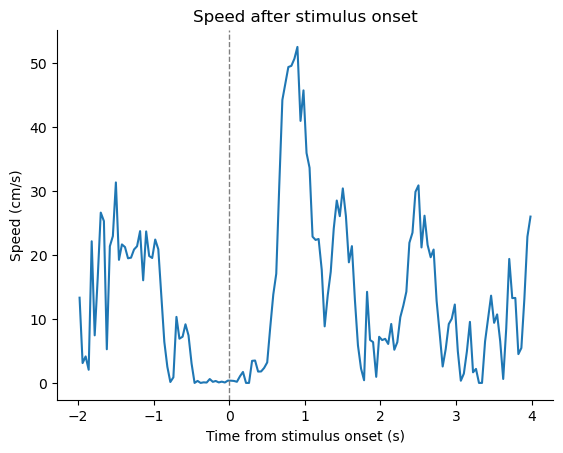

In [20]:
speed_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

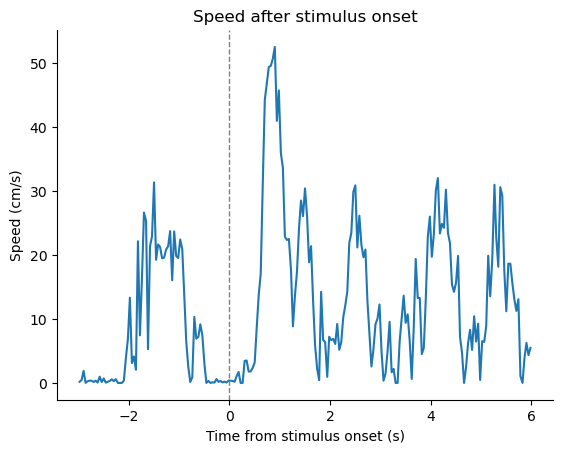

In [21]:
speed_figure(six_second['time_set'].iloc[-1],4, six_second)


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

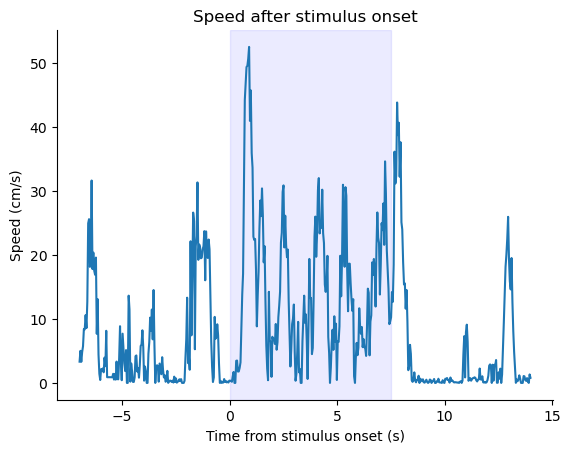

In [22]:
speed_figure(7.5,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

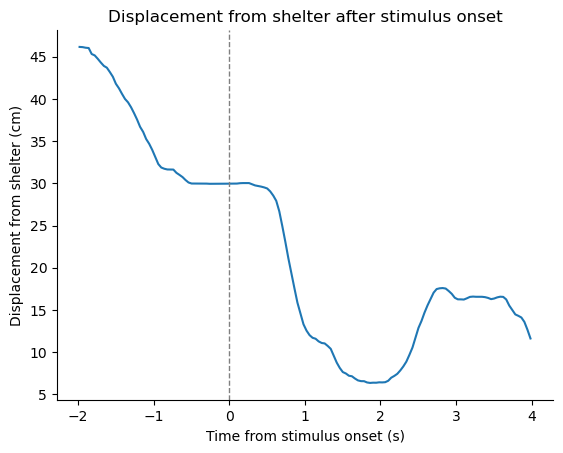

In [23]:
displacement_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

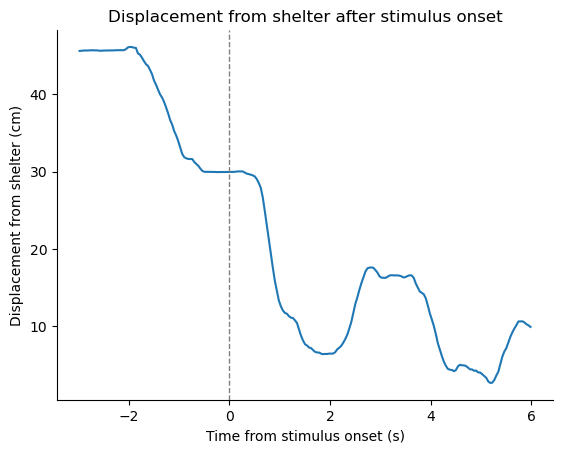

In [24]:
displacement_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

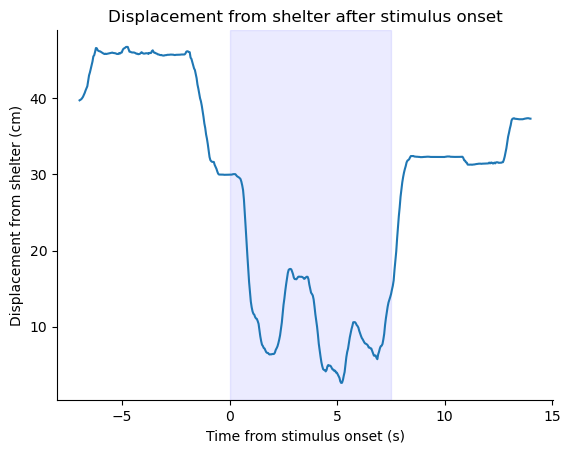

In [25]:
displacement_figure(7.5,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

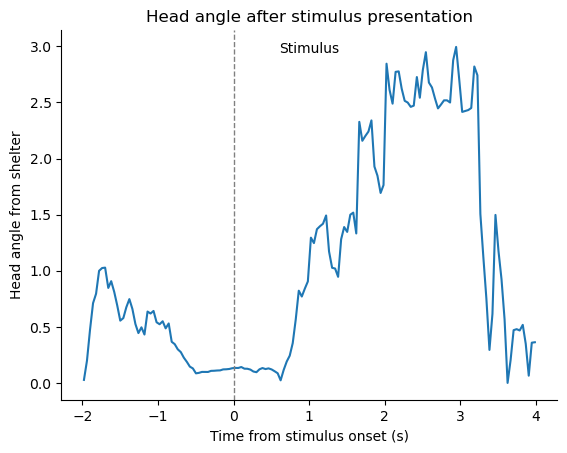

In [26]:
head_angle_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

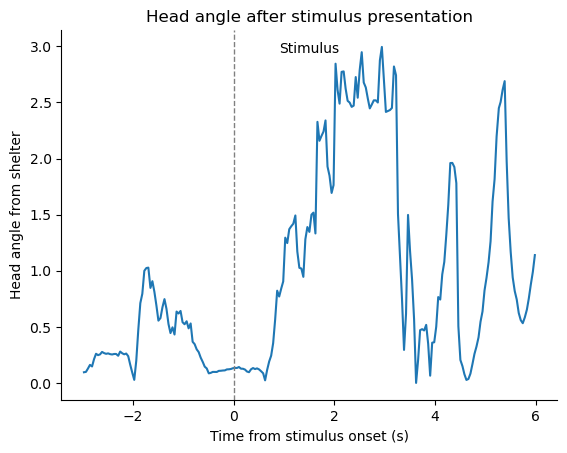

In [27]:
head_angle_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

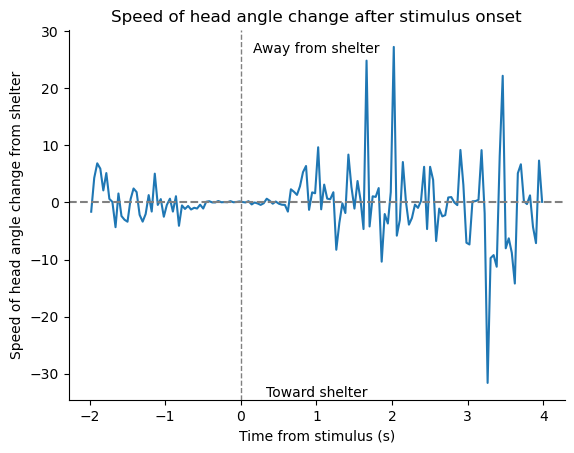

In [28]:
angle_speed_figure(four_second['time_set'].iloc[-1], 4,four_second)

In [29]:
ratio, initial_displacement, total_distance = linearity_ratio(escape_only)

In [30]:
#shelter_rotation(shelter_x, shelter_y, escape_only)

In [31]:
escape_only

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
7700,7700,7700,-0.052396,5.880409,0.999856,-1.676046,6.292855,0.999985,-1.517007,7.162764,...,0.999998,-6.925898,8.544407,0.999993,0.022925,29.964377,0.349866,0.013901,0.134581,0.066842
7701,7701,7701,-0.061524,5.879330,0.999870,-1.678365,6.289173,0.999984,-1.521721,7.160558,...,0.999998,-6.925898,8.541746,0.999994,0.062938,29.976704,0.310433,0.012421,0.134216,-0.009118
7702,7702,7702,-0.071469,5.866024,0.999861,-1.683776,6.289097,0.999985,-1.523457,7.160558,...,0.999998,-6.937421,8.535875,0.999993,0.102938,29.976346,0.180232,0.007209,0.142603,0.209671
7703,7703,7703,-0.078110,5.866024,0.999918,-1.734207,6.273154,0.999988,-1.547326,7.145432,...,0.999998,-7.006887,8.535875,0.999996,0.144704,30.020398,1.062808,0.044389,0.127825,-0.353835
7704,7704,7704,-0.078110,5.866024,0.999922,-1.734207,6.272162,0.999977,-1.547326,7.139427,...,0.999998,-7.096003,8.518555,0.999994,0.182989,30.035230,1.712337,0.065557,0.127295,-0.013824
7705,7705,7705,-0.078110,5.879184,0.999932,-1.734207,6.272162,0.999981,-1.547326,7.139427,...,0.999998,-7.096003,8.468753,0.999994,0.223386,30.035230,0.000000,0.000000,0.119786,-0.185878
7706,7706,7706,0.083771,5.879184,0.999918,-1.666826,6.262738,0.999990,-1.491718,7.139421,...,0.999998,-7.096003,8.446589,0.999994,0.262963,30.035230,0.000000,0.000000,0.102558,-0.435314
7707,7707,7707,0.170171,5.879184,0.999868,-1.550428,6.245108,0.999992,-1.351202,7.139421,...,0.999998,-6.967723,8.435408,0.999992,0.303399,29.895780,3.448713,0.139452,0.096578,-0.147899
7708,7708,7708,0.373349,5.776097,0.999833,-1.401084,6.199427,0.999995,-1.103793,7.117596,...,0.999998,-6.894790,8.433308,0.999994,0.343245,29.757390,3.498884,0.139417,0.122269,0.644764
7709,7709,7709,0.421113,5.747911,0.999836,-1.380938,6.199427,0.999995,-1.094381,7.094417,...,0.999998,-6.773559,8.386564,0.999995,0.383027,29.687629,1.774413,0.070590,0.133495,0.282179


In [32]:
likelihood_data, likelihood_minus_nose, likelihood_center = likelihood_check(0, 8, .9, coord_scaled)

In [33]:
likelihood_data #need to adjust time frame to be useful 

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
7740,7740,7740,30.318171,9.473780,0.509466,29.929575,9.875273,0.998962,30.135502,10.708645,...,0.999965,24.038336,10.665444,0.999933,1.623283,7.150394,21.364326,0.849638,1.332507,-4.666364
7741,7741,7741,30.327839,9.500576,0.086442,30.349180,9.377381,0.998057,30.446575,10.217260,...,0.999922,24.278636,10.229135,0.999963,1.663335,6.882800,12.927941,0.517790,2.326736,24.823441
7742,7742,7742,30.337507,9.527373,0.053417,30.453912,9.167555,0.999098,30.512977,10.028237,...,0.999889,24.369641,10.007427,0.999977,1.703347,6.658796,5.868174,0.234797,2.158056,-4.215737
7743,7743,7743,30.347175,9.554169,0.047010,30.453912,9.167555,0.999142,30.512977,10.028237,...,0.999679,24.369641,9.870815,0.999964,1.744039,6.571748,2.247525,0.091456,2.201569,1.069327
7744,7744,7744,30.356842,9.580966,0.236638,30.453912,9.167555,0.999365,30.512977,10.028237,...,0.999709,24.369641,9.833735,0.999941,1.784320,6.564834,0.422349,0.017013,2.240317,0.961951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7850,7850,7850,27.406533,-7.225233,0.163264,31.249174,-6.288088,0.998845,31.250714,-5.568896,...,0.999962,25.720234,-4.696899,0.999971,6.024423,9.467645,11.658881,0.463371,1.277489,3.463972
7851,7851,7851,27.307776,-7.348993,0.002171,30.889036,-6.288088,0.997638,31.074861,-5.568896,...,0.999972,25.624444,-4.405653,0.999929,6.065216,9.112021,8.718578,0.355657,1.355058,1.901551
7852,7852,7852,27.209018,-7.472754,0.005061,30.567066,-6.288088,0.997962,30.959346,-5.568896,...,0.999948,25.624444,-3.935807,0.999709,6.104704,8.809322,7.666981,0.302754,1.432737,1.967136
7853,7853,7853,27.110260,-7.596514,0.015622,29.637314,-6.462148,0.997985,30.443690,-5.950396,...,0.999680,25.624444,-3.165140,0.999875,6.144410,8.524557,8.735879,0.346867,1.602739,4.281519


In [34]:
rotate, shelter_rotate_x, shelter_rotate_y = rotate_trajectory(shelter_x, shelter_y, escape_only)
normalized_df, shelter_normalized_x, shelter_normalized_y, combined_range = normalize_rotation(rotate, shelter_rotate_x, shelter_rotate_y)

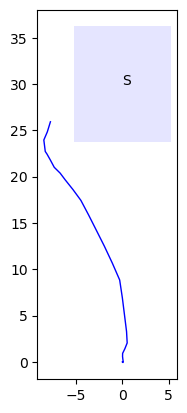

In [35]:
fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
    #make x and y scales equal - present as a circle


    #plot the center x and y coordinates
x = rotate['rotated_x']
y = rotate['rotated_y']

ax.text(shelter_rotate_x,shelter_rotate_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_rotate_x - 5.25), (shelter_rotate_y-6.25)), 10.5,12.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)


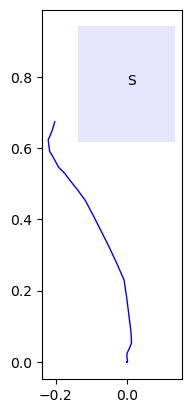

In [36]:

fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
x = normalized_df['x']
y = normalized_df['y']

ax.text(shelter_normalized_x,shelter_normalized_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_normalized_x - 5.25/combined_range), (shelter_normalized_y-6.25/combined_range)), 10.5/combined_range,12.5/combined_range,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)
    

